# Практичне завдання №8
### Варіант 16

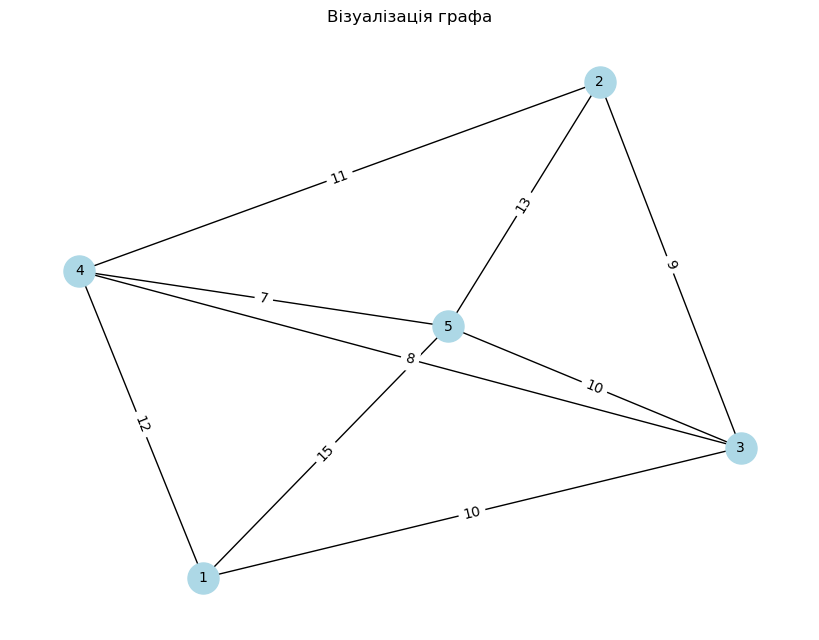

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Заданий зважений граф
edges = [
    (1, 3, 10), (1, 4, 12), (1, 5, 15),
    (2, 3, 9), (2, 4, 11), (2, 5, 13),
    (3, 4, 8), (3, 5, 10), (4, 5, 7)
]

# Створюємо граф за допомогою NetworkX
G = nx.Graph()
for u, v, w in edges:
    G.add_edge(u, v, weight=w)

# Візуалізація графа
pos = nx.spring_layout(G)  # Розташування вузлів
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Візуалізація графа")
plt.show()


## 1. Метод грубої сили:

In [11]:
def tsp_brute_force(graph):
   
    nodes = list(graph.nodes)
    min_cost = float('inf')
    best_path = None

    # Генерація всіх перестановок (маршрутів)
    for perm in itertools.permutations(nodes):
        # Додаємо останнє ребро для повернення до початкової вершини
        cost = 0
        valid = True
        for i in range(len(perm)):
            u, v = perm[i], perm[(i + 1) % len(perm)]
            if graph.has_edge(u, v):
                cost += graph[u][v]['weight']
            else:
                valid = False
                break

        if valid and cost < min_cost:
            min_cost = cost
            best_path = perm

    return min_cost, best_path


# Застосування методу грубої сили до нашого графа
min_cost_brute_force, best_path_brute_force = tsp_brute_force(G)
min_cost_brute_force, best_path_brute_force


(51, (1, 3, 2, 5, 4))

## 2. Алгоритм найближчого сусіда:

In [15]:
def tsp_nearest_neighbor(graph, start):
  
    nodes = set(graph.nodes)
    path = [start]
    current = start
    total_cost = 0

    while len(path) < len(nodes):
        neighbors = [(neighbor, graph[current][neighbor]['weight']) for neighbor in graph.neighbors(current) if neighbor not in path]
        if not neighbors:
            break
        # Знаходимо найближчого сусіда
        next_node, weight = min(neighbors, key=lambda x: x[1])
        path.append(next_node)
        total_cost += weight
        current = next_node

    # Повертаємося в початкову вершину
    if len(path) == len(nodes) and graph.has_edge(current, start):
        total_cost += graph[current][start]['weight']
        path.append(start)

    return total_cost, path


# Застосування алгоритму найближчого сусіда до нашого графа, починаючи з вершини 1
min_cost_nn, best_path_nn = tsp_nearest_neighbor(G, start=1)
min_cost_nn, best_path_nn


(38, [1, 3, 4, 5, 2])

### Складність алгоритмів

1. **Метод грубої сили**:
   - **Часова складність**: Оскільки ми генеруємо всі перестановки вершин \( $ n! $ \) і для кожної перевіряємо сумарну вартість (що займає \( $ O(n) $ \)), загальна складність буде:
     \[ $
     O(n \cdot n!) 
     $ \]
   - Це експоненціальний алгоритм, що обмежує його використання для малих графів (\( $ n \leq 10 $ \)).

2. **Алгоритм найближчого сусіда**:
   - **Часова складність**: Алгоритм виконує \( $ n-1 $ \) кроків, на кожному з яких шукає найближчого сусіда. Пошук займає \( $ O(n) $ \) операцій для кожного кроку, тому загальна складність:
     \[ $
     O(n^2)
     $ \]
   - Якщо оптимізувати пошук найближчих сусідів (наприклад, за допомогою структури даних), складність може бути трохи більшою — \( $ O(n^2 \cdot \log n) $ \).

---

### Висновки

1. **Метод грубої сили**:
   - **Переваги**: Гарантує знаходження оптимального маршруту.
   - **Недоліки**: Має високу експоненційну складність \( $ O(n \cdot n!) $ \), що робить його непридатним для великих графів.

2. **Алгоритм найближчого сусіда**:
   - **Переваги**: Швидший за грубу силу, з часом виконання \( $ O(n^2) $ \), підходить для більших графів.
   - **Недоліки**: Може давати субоптимальні результати, оскільки вибір найближчого сусіда не гарантує глобально оптимальний маршрут.

# Контрольні питання

### 1. Що таке жадібний алгоритм?

**Жадібний алгоритм** — це алгоритм, який на кожному етапі вибирає найкраще, на його думку, локальне рішення, сподіваючись, що ці вибори приведуть до глобально оптимального результату. Жадібні алгоритми намагаються досягти оптимальності, вибираючи на кожному кроці найвигідніший варіант, не враховуючи можливі наслідки для майбутніх кроків.

---

### 2. Які головні принципи роботи жадібних алгоритмів?

Основні принципи роботи жадібних алгоритмів:

1. **Локальний оптимум**: Алгоритм вибирає найкращий можливий варіант на поточному кроці, не турбуючись про глобальне рішення.
2. **Незворотність вибору**: Після того, як алгоритм зробить вибір на поточному кроці, він не переглядає або змінює його.
3. **Інкрементальний процес**: Рішення будуються поступово, додаючи одне за одним елементи або вибори, без зворотних кроків.

---

### 3. Яка головна відмінність між жадібними алгоритмами та динамічним програмуванням?

**Основні відмінності**:

- **Жадібні алгоритми** вибирають найкращий варіант на кожному кроці (локальний оптимум), не враховуючи попередні вибори або майбутні наслідки, що не завжди гарантує глобально оптимальний результат.
- **Динамічне програмування** враховує попередні рішення (підзадачі) та використовує їх для отримання оптимального глобального рішення. Під час розв'язання задачі динамічне програмування перевіряє всі можливі варіанти і забезпечує глобальну оптимальність.

**Жадібний підхід** більш швидкий, але не завжди дає оптимальний результат, в той час як **динамічне програмування** гарантує оптимальність, але може бути повільнішим та складнішим для реалізації.

---

### 4. Наведіть приклади задач, які можна розв’язати за допомогою жадібних алгоритмів.

Приклади задач, які можна розв'язати за допомогою жадібних алгоритмів:

1. **Задача про рюкзак** (для дробових предметів): вибір предметів з максимальною вигодою, де предмети можуть бути розділені.
2. **Задача про найкоротший шлях** (Алгоритм Дейкстри): вибір найкоротшого шляху між двома точками на графі.
3. **Задача про мінімальне покриття множини**: вибір елементів для покриття всієї множини з мінімальними витратами.
4. **Задача про код Хаффмана**: побудова оптимального коду для стиснення даних.

---

### 5. Які можуть бути обмеження у використанні жадібних алгоритмів для розв'язання екстремальних задач?

Обмеження у використанні жадібних алгоритмів:

1. **Не гарантують глобального оптимуму**: Жадібні алгоритми можуть давати локально оптимальні рішення, але не завжди глобально оптимальні.
2. **Залежність від вибору початкової умови**: Результат може сильно залежати від того, з якої вершини або елемента розпочинається пошук.
3. **Не завжди підходять для складних задач**: У деяких задачах локальний вибір може призвести до глобально не оптимального результату, наприклад, у задачах з перекриттям підзадач.
4. **Обмеження на тип задач**: Жадібні алгоритми працюють лише для тих задач, де локальні оптимальні рішення призводять до глобального оптимуму, що не завжди так.

---

### 6. Чому жадібні алгоритми часто використовуються для наближеного розв’язання екстремальних задач?

**Причини використання жадібних алгоритмів для наближеного розв’язання**:

1. **Швидкість виконання**: Жадібні алгоритми часто працюють дуже швидко завдяки простоті та відсутності необхідності переглядати всі варіанти.
2. **Легкість реалізації**: Реалізація жадібних алгоритмів зазвичай є простою та ефективною.
3. **Придатність для великих задач**: У випадках, коли точне рішення складне або неможливе через великі обсяги даних, жадібні алгоритми можуть дати добрий наближений результат за прийнятний час.
4. **Розв'язання з хорошою апроксимацією**: У багатьох практичних задачах жадібні алгоритми дають розв'язки, близькі до оптимальних, навіть якщо не гарантують глобального оптимуму.
